# Customer Churn Classification - Sanketh Reddy

## This dataset consists of 5986 rows and 21 columns (when importing the csv file, there will be 22 columns as the first column will be "Unnamed: 0")

## This dataset has characteristics about customers from a Telecom company, and it has information regarding whether or not these customers left the company (churn). Each of the rows contains characteristics for each unique customer.

## The goal will be to create a binary classification model that can predict Customer Churn.

### Importing pandas, numpy, matplotlib, and seaborn and reading in the dataset and checking its characteristics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("telecom_users.csv")
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),No,24.10,1734.65
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No,88.15,3973.2
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),Yes,74.95,2869.85
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,No,55.90,238.5
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,No,53.45,119.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


##### TotalCharges column is a type "object" which means there may be some empty strings there. Thus, the following cell will convert those empty strings to be a float value of 0

In [4]:
def convertStringToFloat(total):
    if total == ' ':
        return float(0)
    else:
        return float(total)

df['TotalCharges'] = [convertStringToFloat(t) for t in df['TotalCharges']]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


In [6]:
df.isna().sum()

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
MonthlyCharges      0
TotalCharges        0
dtype: int64

### From above, there are 0 null values in the dataset. Thus, the following cells will be randomly placing null values in the dataset

In [7]:
# Randomly Introducing NaN Values in the dataset
np.random.seed(2)
for i in range(3):
    col = np.random.randint(21)
    n = np.random.uniform(0, 0.1) # 10% missing values
    df.loc[df.sample(frac=n).index, df.columns[col]] = np.nan

In [8]:
df.isna().sum()

Unnamed: 0            0
customerID            0
gender                0
SeniorCitizen         0
Partner             210
Dependents            0
tenure                0
PhoneService          0
MultipleLines       111
InternetService       0
OnlineSecurity      299
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Churn                 0
MonthlyCharges        0
TotalCharges          0
dtype: int64

In [9]:
df.isna().sum().sum()

620

In [10]:
# percent of null values in dataset
df.isna().sum().sum()/len(df) * 100

10.357500835282325

### From above, there are now 620 null values in the dataset which means about 10% of the dataset has null values

In [11]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),No,24.10,1734.65
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No,88.15,3973.20
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),Yes,74.95,2869.85
3,6739,6994-KERXL,Male,0,No,No,4,Yes,NaN,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,No,55.90,238.50
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,No,53.45,119.50


In [12]:
df.info() # Partner, MultipleLines, OnlineSecurity columns have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5776 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5875 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5687 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


###  The columns with missing values are: Partner, MultipleLines, and OnlineSecurity
###  The next few cells will be figuring out how to impute the missing values in these columns
###  The distribution of values from other columns will help determine how to impute the missing values in the Partner, MultipleLines, and OnlineSecurity columns

#### Imputing missing values for Partner

#####  From the barplot below, customers with dependents were significantly more likely to have partners
##### Thus, the missing values for the Partner column will be imputed to be "Yes" if the value for the Dependents column was also "Yes"

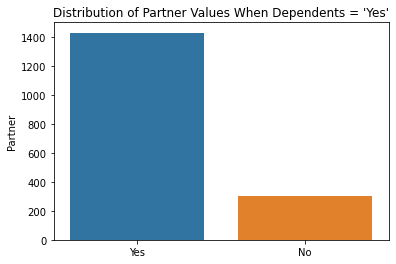

In [13]:
sns.barplot(x=df[df['Dependents']=='Yes']['Partner'].value_counts().index, y=df[df['Dependents'] == 'Yes']['Partner'].value_counts())
plt.title("Distribution of Partner Values When Dependents = 'Yes'")
plt.show()

##### From the barplot below, customers with no dependents were significantly more likely to not have partners
##### Thus, the missing values for the Partner column will be imputed to be "No" if the value for the Dependents column was also "No"

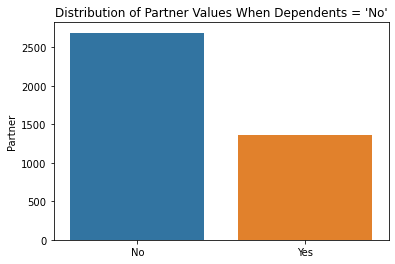

In [14]:
sns.barplot(x=df[df['Dependents']=='No']['Partner'].value_counts().index, y=df[df['Dependents'] == 'No']['Partner'].value_counts())
plt.title("Distribution of Partner Values When Dependents = 'No'")
plt.show()

##### Imputing the missing values for the Partner column

In [15]:
def fillMissingValuesPartner(partner, dependents):
    if isinstance(partner, float):
        if dependents == 'Yes':
            return 'Yes'
        else:
            return 'No'
    else:
        return partner

df['Partner'] = [fillMissingValuesPartner(p,d) for (p,d) in zip(df['Partner'], df['Dependents'])]
df.isna().sum() # Partner column has 0 null values

Unnamed: 0            0
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       111
InternetService       0
OnlineSecurity      299
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Churn                 0
MonthlyCharges        0
TotalCharges          0
dtype: int64

In [16]:
df['Partner'].value_counts()

No     3140
Yes    2846
Name: Partner, dtype: int64

#### Imputing missing values for MultipleLines

##### From the barplot below, customers that streamed movies were significantly more likely to have multiple lines
##### Thus, the missing values for the MultipleLines column will be imputed to be "Yes" if the value for the StreamingMovies column was also "Yes"

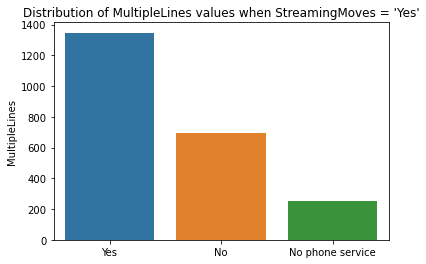

In [17]:
sns.barplot(x=df[df['StreamingMovies']=='Yes']['MultipleLines'].value_counts().index, y=df[df['StreamingMovies'] == 'Yes']['MultipleLines'].value_counts())
plt.title("Distribution of MultipleLines values when StreamingMoves = 'Yes'")
plt.show()

##### From the barplot below, customers that did not stream movies were more likely to not have multiple lines
##### Thus, the missing values for the MultipleLines column will be imputed to be "No" if the value for the StreamingMovies column was also "No"

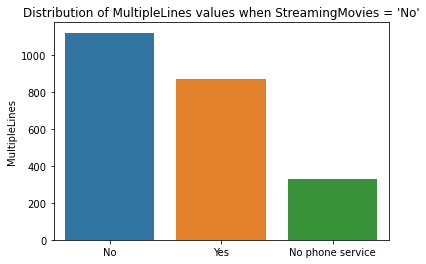

In [18]:
sns.barplot(x=df[df['StreamingMovies']=='No']['MultipleLines'].value_counts().index, y=df[df['StreamingMovies'] == 'No']['MultipleLines'].value_counts())
plt.title("Distribution of MultipleLines values when StreamingMovies = 'No'")
plt.show()

##### From the barplot below, customers without internet service were significantly more likely to not have multiple lines
##### Thus, the missing values for the MultipleLines column will be imputed to be "No" if the value for the InternetService column was also "No"

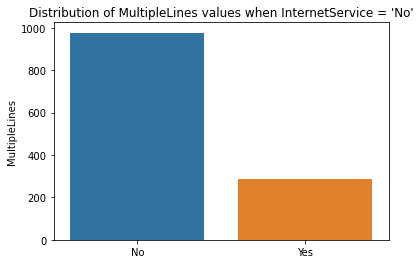

In [19]:
sns.barplot(x=df[df['InternetService']=='No']['MultipleLines'].value_counts().index, y=df[df['InternetService'] == 'No']['MultipleLines'].value_counts())
plt.title("Distribution of MultipleLines values when InternetService = 'No'")
plt.show()

##### From the barplot below, customers without phone service did not have multiple lines
##### Thus, the missing values for the MultipleLines column will be imputed to be "No phone service" if the value for the PhoneService column was "No"

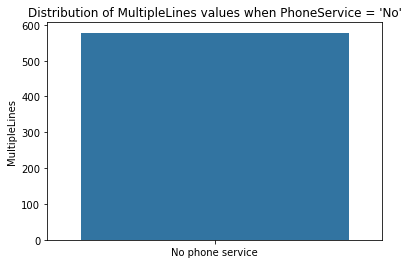

In [20]:
sns.barplot(x=df[df['PhoneService']=='No']['MultipleLines'].value_counts().index, y=df[df['PhoneService'] == 'No']['MultipleLines'].value_counts())
plt.title("Distribution of MultipleLines values when PhoneService = 'No'")
plt.show()

##### Imputing Missing Values for MultipleLines column

In [21]:
def fillMissingValuesMultipleLines(multipleLines, streamingMovies, internetService, phoneService):
    if isinstance(multipleLines, float):
        if streamingMovies == 'Yes':
            return 'Yes'
        elif streamingMovies == 'No':
            return 'No'
        elif internetService == 'No':
            return 'No'
        elif phoneService == 'No':
            return 'No phone service'
    else:
        return multipleLines

df['MultipleLines'] = [fillMissingValuesMultipleLines(ml, sm, iservice, ps) for (ml,sm,iservice,ps) in zip(df['MultipleLines'], df['StreamingMovies'], df['InternetService'], df['PhoneService'])]
df.isna().sum() # MultipleLines column has 0 null values

Unnamed: 0            0
customerID            0
gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines         0
InternetService       0
OnlineSecurity      299
OnlineBackup          0
DeviceProtection      0
TechSupport           0
StreamingTV           0
StreamingMovies       0
Contract              0
PaperlessBilling      0
PaymentMethod         0
Churn                 0
MonthlyCharges        0
TotalCharges          0
dtype: int64

In [22]:
df['MultipleLines'].value_counts()

No                  2860
Yes                 2548
No phone service     578
Name: MultipleLines, dtype: int64

#### Imputing missing values for OnlineSecurity

##### From the barplot below, customers without internet service did not have OnlineSecurity
##### Thus, the missing values for the OnlineSecurity column will be imputed to be "No internet service" if the value for the InternetService column was "No"

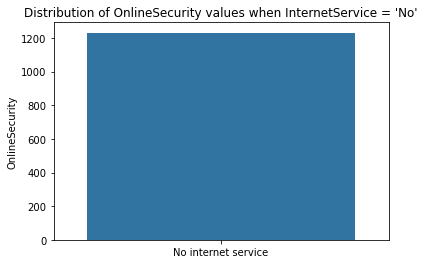

In [23]:
sns.barplot(x=df[df['InternetService']=='No']['OnlineSecurity'].value_counts().index, y=df[df['InternetService'] == 'No']['OnlineSecurity'].value_counts())
plt.title("Distribution of OnlineSecurity values when InternetService = 'No'")
plt.show()

##### From the barplot below, customers without online backup were significantly more likely to not have online security
##### Thus, the missing values for the OnlineSecurity column will be imputed to be "No" if the value for the OnlineBackup column was also "No"

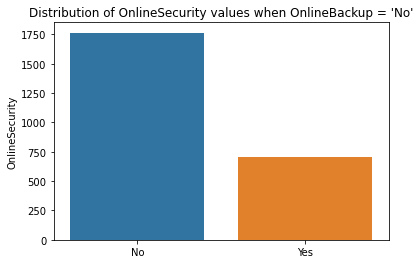

In [24]:
sns.barplot(x=df[df['OnlineBackup']=='No']['OnlineSecurity'].value_counts().index, y=df[df['OnlineBackup'] == 'No']['OnlineSecurity'].value_counts())
plt.title("Distribution of OnlineSecurity values when OnlineBackup = 'No'")
plt.show()

##### Imputing Missing Values for OnlineSecurity column

In [25]:
def fillMissingValuesOnlineSecurity(onlineSecurity, internetService, onlineBackup):
    if isinstance(onlineSecurity, float):
        if internetService == 'No':
            return 'No internet service'
        elif onlineBackup == 'No':
            return 'No'
        else:
            return 'Yes'
    else:
        return onlineSecurity

df['OnlineSecurity'] = [fillMissingValuesOnlineSecurity(os, iservice, ob) for (os,iservice,ob) in zip(df['OnlineSecurity'], df['InternetService'], df['OnlineBackup'])]
df.isna().sum() # OnlineSecurity has 0 null values

Unnamed: 0          0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Churn               0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [26]:
df['OnlineSecurity'].value_counts()

No                     2976
Yes                    1719
No internet service    1291
Name: OnlineSecurity, dtype: int64

#### Barplot showing the distribution of the target column of "Churn"
#### From the Barplot below, there is a huge imbalance of values in the "Churn" column as the values for "No" are significantly higher than the values for "Yes"
#### This imbalance of values in the "Churn" column will be taken into effect later on

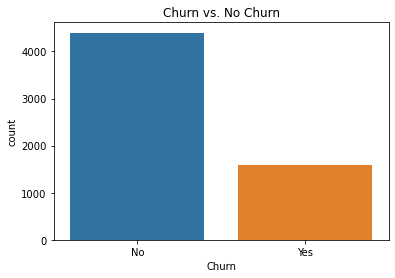

In [27]:
g = sns.countplot(df['Churn'])
g.set_xticklabels(['No','Yes'])
plt.title('Churn vs. No Churn')
plt.show()

#### Mapping categorical columns with 'Yes'/'No' values to integer values
#### Note, for the 'Churn' column, 'Yes' will be marked as 1 and 'No' will be marked as 0 as customers churning is the target we want to focus on

In [28]:
df['gender'] = df['gender'].map({'Male':1, 'Female':0}).astype(int)
df['Partner'] = df['Partner'].map({'Yes':1, 'No':0}).astype(int)
df['Dependents'] = df['Dependents'].map({'Yes':1, 'No':0}).astype(int)
df['PhoneService'] = df['PhoneService'].map({'Yes':1, 'No':0}).astype(int)
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes':1, 'No':0}).astype(int)
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0}).astype(int)

In [29]:
cols = pd.get_dummies(df['MultipleLines'], prefix= 'MultipleLines')
df[cols.columns] = cols
cols = pd.get_dummies(df['InternetService'], prefix= 'InternetService')
df[cols.columns] = cols
cols = pd.get_dummies(df['OnlineSecurity'], prefix= 'OnlineSecurity')
df[cols.columns] = cols
cols = pd.get_dummies(df['OnlineBackup'], prefix= 'OnlineBackup')
df[cols.columns] = cols
cols = pd.get_dummies(df['DeviceProtection'], prefix= 'DeviceProtection')
df[cols.columns] = cols
cols = pd.get_dummies(df['TechSupport'], prefix= 'TechSupport')
df[cols.columns] = cols
cols = pd.get_dummies(df['StreamingTV'], prefix= 'StreamingTV')
df[cols.columns] = cols
cols = pd.get_dummies(df['StreamingMovies'], prefix= 'StreamingMovies')
df[cols.columns] = cols
cols = pd.get_dummies(df['Contract'], prefix= 'Contract')
df[cols.columns] = cols
cols = pd.get_dummies(df['PaymentMethod'], prefix= 'PaymentMethod')
df[cols.columns] = cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 53 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Unnamed: 0                               5986 non-null   int64  
 1   customerID                               5986 non-null   object 
 2   gender                                   5986 non-null   int32  
 3   SeniorCitizen                            5986 non-null   int64  
 4   Partner                                  5986 non-null   int32  
 5   Dependents                               5986 non-null   int32  
 6   tenure                                   5986 non-null   int64  
 7   PhoneService                             5986 non-null   int32  
 8   MultipleLines                            5986 non-null   object 
 9   InternetService                          5986 non-null   object 
 10  OnlineSecurity                           5986 no

In [30]:
df = df.drop(['customerID','Unnamed: 0','MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'], axis = 1)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 41 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5986 non-null   int32  
 1   SeniorCitizen                            5986 non-null   int64  
 2   Partner                                  5986 non-null   int32  
 3   Dependents                               5986 non-null   int32  
 4   tenure                                   5986 non-null   int64  
 5   PhoneService                             5986 non-null   int32  
 6   PaperlessBilling                         5986 non-null   int32  
 7   Churn                                    5986 non-null   int32  
 8   MonthlyCharges                           5986 non-null   float64
 9   TotalCharges                             5986 non-null   float64
 10  MultipleLines_No                         5986 no

#### Setting the target value for the model as the 'Churn' column and the independent variables for the model as the other columns

In [32]:
y = df['Churn']
X = df.drop('Churn', axis=1)

### Splitting the dataset into the training and test sets
### Preprocessing the data by implementing the StandardScaler library
### Standardizing the training set first and then using the same parameters that were used to standardize the training set as the parameters that will be used to standardize the test set
### The same parameters are being used to standardize both the training and test sets to avoid data leakage issues

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### The below cell illustrates the issue with the imbalance of values in the target values for the training set (as mentioned above)

In [34]:
unique, counts = np.unique(y_train.values, return_counts=True)
print('Values from the original y_train:')
print(np.asarray((unique, counts)).T)

Values from the original y_train:
[[   0 2969]
 [   1 1041]]


#### To solve this imbalance of values issue in the target values for the training set, the Random Undersampling method will be used to make the distribution of values to be more equal in the target values for the training set

#### Random Undersampling was used because Random Oversampling can result in overfitting for models

In [35]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0, replacement=True)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

unique, counts = np.unique(y_train.values, return_counts=True)
print('Values from the original y_train:')
print(np.asarray((unique, counts)).T)
print()
unique, counts = np.unique(y_train_rus.values, return_counts=True)
print('Values from the original y_train after random undersampling:')
print(np.asarray((unique, counts)).T)

Values from the original y_train:
[[   0 2969]
 [   1 1041]]

Values from the original y_train after random undersampling:
[[   0 1041]
 [   1 1041]]


In [36]:
unique, counts = np.unique(y_test.values, return_counts=True)
print('Values from y_test:')
print(np.asarray((unique, counts)).T)

Values from y_test:
[[   0 1430]
 [   1  546]]


# GridSearchCV for KNN, Logistic Regression, SVM Rbf Kernel, SVM Poly (degree = 3) Kernel, SVM Linear Kernel, Linear SVM, Decision Tree, and Random Forest Classification Models

## The evaluation strategy that will be used to determine how effective each model is will be determining the models' f1-score values. 
## Since our dataset and target values are focused on customer churn, we want the company to accurately see which types of customers will churn ('Churn' column having a value of 1) and leave the company.
## Thus, we want our model to identify which customers will actually churn as accurate as possible. Additionally, we also want our model to identify the correct customers that will actually churn, and we do not want the model to predict that a significant amount of non-churn customers will churn
## If the company knows which types of customers are more likely to churn, then the company can provide these types of customers with different incentives to stay with the company such as providing these customers with retention messages, coupons, discounts, promo deals, etc. to try and persuade these customers to stay with the company. Additionally, we also don't want the company to unnecessarily give these incentives to customers who will not be churning.

### KNN Classification

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score
knn = KNeighborsClassifier()
param_grid = {'n_neighbors':[1, 5, 10, 15, 20], 'weights': ['uniform', 'distance']}

grid_knn = GridSearchCV(knn, param_grid=param_grid, cv = 5, scoring='f1')
grid_knn.fit(X_train_rus, y_train_rus)
grid_knn.score(X_train_rus, y_train_rus)

0.99951992318771

In [38]:
grid_knn.score(X_test, y_test)

0.5849802371541502

In [39]:
grid_knn.best_params_

{'n_neighbors': 20, 'weights': 'distance'}

In [40]:
grid_knn.best_score_

0.788615285156442

In [41]:
df_knn_results = pd.DataFrame(grid_knn.cv_results_)
df_knn_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001197,4.011393e-04,0.025474,0.007009,1,uniform,"{'n_neighbors': 1, 'weights': 'uniform'}",0.732057,0.717445,0.712589,0.736077,0.753623,0.730358,0.014556,9
1,0.003124,6.248665e-03,0.006249,0.007653,1,distance,"{'n_neighbors': 1, 'weights': 'distance'}",0.732057,0.717445,0.712589,0.736077,0.753623,0.730358,0.014556,9
2,0.000000,0.000000e+00,0.024994,0.007652,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.728111,0.722611,0.746137,0.760000,0.751708,0.741713,0.014169,8
3,0.000000,0.000000e+00,0.015622,0.000002,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.744076,0.733496,0.764302,0.774648,0.781176,0.759540,0.018091,5
4,0.000000,0.000000e+00,0.026097,0.008788,10,uniform,"{'n_neighbors': 10, 'weights': 'uniform'}",0.732719,0.737327,0.756264,0.757991,0.761682,0.749197,0.011795,7
5,0.000200,3.992081e-04,0.018196,0.003003,10,distance,"{'n_neighbors': 10, 'weights': 'distance'}",0.751152,0.758294,0.771689,0.786207,0.787879,0.771044,0.014642,3
6,0.000599,4.886945e-04,0.027126,0.003878,15,uniform,"{'n_neighbors': 15, 'weights': 'uniform'}",0.744186,0.742857,0.755940,0.788136,0.740576,0.754339,0.017715,6
7,0.000000,0.000000e+00,0.018746,0.006248,15,distance,"{'n_neighbors': 15, 'weights': 'distance'}",0.768889,0.754098,0.786517,0.813483,0.774942,0.779586,0.019913,2
8,0.000401,4.906867e-04,0.029348,0.008788,20,uniform,"{'n_neighbors': 20, 'weights': 'uniform'}",0.747826,0.750000,0.769231,0.791304,0.751678,0.762008,0.016507,4
9,0.000998,1.784161e-07,0.017225,0.001627,20,distance,"{'n_neighbors': 20, 'weights': 'distance'}",0.776786,0.772414,0.797297,0.817778,0.778802,0.788615,0.016879,1


In [42]:
df_knn_results[df_knn_results['rank_test_score'] == 1][['rank_test_score', 'params', 'mean_test_score']]

,rank_test_score,params,mean_test_score
9,1,"{'n_neighbors': 20, 'weights': 'distance'}",0.788615


In [43]:
y_knn_train_predict = grid_knn.predict(X_train_rus)
y_knn_predict = grid_knn.predict(X_test)
knn_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_knn_predict)
knn_classification_report = classification_report(y_true = y_test, y_pred = y_knn_predict)
print(knn_cmatrix)
print()
print(knn_classification_report)

[[902 528]
 [102 444]]

              precision    recall  f1-score   support

           0       0.90      0.63      0.74      1430
           1       0.46      0.81      0.58       546

    accuracy                           0.68      1976
   macro avg       0.68      0.72      0.66      1976
weighted avg       0.78      0.68      0.70      1976



In [44]:
knn_classifier = KNeighborsClassifier(n_neighbors=20, weights='distance')
knn_classifier.fit(X_train_rus,y_train_rus)
print('Train F1-Score:', f1_score(y_true=y_train_rus, y_pred=knn_classifier.predict(X_train_rus)))
print('Test F1-Score:', f1_score(y_true=y_test, y_pred=knn_classifier.predict(X_test)))

Train F1-Score: 0.99951992318771
Test F1-Score: 0.5849802371541502


In [45]:
report_table = [['KNN', "n_neighbors = 20, weights = 'distance'", f1_score(y_true=y_train_rus, y_pred=knn_classifier.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=knn_classifier.predict(X_test)),
               df_knn_results[df_knn_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [46]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.99952,0.58498,0.788615


### Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

log_reg = LogisticRegression(solver='liblinear',multi_class='auto', random_state=0)

grid_log = GridSearchCV(log_reg, param_grid = param_grid, cv = 5, scoring = 'f1')
grid_log.fit(X_train_rus, y_train_rus)
grid_log.score(X_train_rus, y_train_rus)

0.7824897400820793

In [48]:
grid_log.score(X_test, y_test)

0.6097388849682428

In [49]:
grid_log.best_params_

{'C': 0.01, 'penalty': 'l2'}

In [50]:
grid_log.best_score_

0.779720276930007

In [51]:
df_log_results = pd.DataFrame(grid_log.cv_results_)
df_log_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003683,0.002356,0.003812,4.194451e-03,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",0.767932,0.755187,0.775000,0.786008,0.775862,0.771998,0.010192,10
1,0.005784,0.000399,0.001596,7.979876e-04,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.747706,0.780045,0.783964,0.800000,0.786885,0.779720,0.017353,1
2,0.008776,0.002309,0.000997,6.468134e-07,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",0.750000,0.766744,0.773455,0.800000,0.775120,0.773064,0.016136,9
3,0.008377,0.001197,0.001197,3.984693e-04,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.753488,0.771028,0.780045,0.795556,0.781775,0.776378,0.013877,8
4,0.035072,0.006707,0.001596,4.883052e-04,1,l1,"{'C': 1, 'penalty': 'l1'}",0.752887,0.778555,0.781818,0.791946,0.780142,0.777070,0.012964,7
5,0.011369,0.000489,0.001796,3.991609e-04,1,l2,"{'C': 1, 'penalty': 'l2'}",0.750000,0.775701,0.783599,0.797297,0.780142,0.777348,0.015463,3
6,0.252954,0.083336,0.000599,7.985362e-04,10,l1,"{'C': 10, 'penalty': 'l1'}",0.756381,0.772093,0.779043,0.795506,0.783019,0.777208,0.012899,5
7,0.017552,0.001953,0.001400,4.920712e-04,10,l2,"{'C': 10, 'penalty': 'l2'}",0.756381,0.772093,0.781818,0.795506,0.780142,0.777188,0.012842,6
8,0.227379,0.025247,0.000200,3.997803e-04,100,l1,"{'C': 100, 'penalty': 'l1'}",0.759259,0.769231,0.781818,0.795506,0.783019,0.777767,0.012442,2
9,0.012497,0.011689,0.003124,6.248665e-03,100,l2,"{'C': 100, 'penalty': 'l2'}",0.759259,0.767442,0.781818,0.794582,0.783019,0.777224,0.012445,4


In [52]:
df_log_results[df_log_results['rank_test_score'] == 1][['rank_test_score', 'params', 'mean_test_score']]

,rank_test_score,params,mean_test_score
1,1,"{'C': 0.01, 'penalty': 'l2'}",0.77972


In [53]:
y_log_reg_train_predict = grid_log.predict(X_train_rus)
y_log_reg_predict = grid_log.predict(X_test)
log_reg_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_log_reg_predict)
log_reg_classification_report = classification_report(y_true = y_test, y_pred = y_log_reg_predict)
print(log_reg_cmatrix)
print()
print(log_reg_classification_report)

[[991 439]
 [114 432]]

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1430
           1       0.50      0.79      0.61       546

    accuracy                           0.72      1976
   macro avg       0.70      0.74      0.70      1976
weighted avg       0.79      0.72      0.73      1976



In [54]:
log_reg_classifier = LogisticRegression(solver='liblinear',multi_class='auto', random_state=0, C=0.01, penalty='l2')
log_reg_classifier.fit(X_train_rus,y_train_rus)
print('Train F1-Score:', f1_score(y_true=y_train_rus, y_pred=log_reg_classifier.predict(X_train_rus)))
print('Test F1-Score:', f1_score(y_true=y_test, y_pred=log_reg_classifier.predict(X_test)))

Train F1-Score: 0.7824897400820793
Test F1-Score: 0.6097388849682428


In [55]:
report_table += [['Logistic Regression', "C = 0.01, penalty = 'l2'", f1_score(y_true=y_train_rus, y_pred=log_reg_classifier.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=log_reg_classifier.predict(X_test)),
                 df_log_results[df_log_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [56]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.99952,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.78249,0.609739,0.779720


### SVM (kernel = 'rbf') Classification

In [57]:
from sklearn import svm
svc_rbf = svm.SVC(kernel='rbf', random_state=0) 
param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto', '0.5']}

grid_rbf = GridSearchCV(svc_rbf, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='f1')
grid_rbf.fit(X_train_rus, y_train_rus)
grid_rbf.score(X_train_rus, y_train_rus)

C:\Users\peech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.75700611 0.75802842        nan 0.77090895 0.76964639        nan
 0.77571766 0.77647656        nan 0.74625692 0.75177623        nan
 0.718476   0.71746781        nan]
  warnings.warn(


0.8190563444800734

In [58]:
grid_rbf.score(X_test, y_test)

0.6068675543097407

In [59]:
grid_rbf.best_params_

{'C': 1, 'gamma': 'auto'}

In [60]:
grid_rbf.best_score_

0.7764765643671859

In [61]:
df_grid_rbf_results = pd.DataFrame(grid_rbf.cv_results_)
df_grid_rbf_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.221407,4.278684e-03,0.318946,0.220483,0.01,scale,"{'C': 0.01, 'gamma': 'scale'}",0.738041,0.766440,0.745455,0.765864,0.769231,0.757006,0.012728,6
1,0.227788,6.167958e-03,0.312963,0.207089,0.01,auto,"{'C': 0.01, 'gamma': 'auto'}",0.740909,0.766440,0.748299,0.764192,0.770302,0.758028,0.011376,5
2,0.001994,5.135693e-07,0.000000,0.000000,0.01,0.5,"{'C': 0.01, 'gamma': '0.5'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
3,0.158973,3.969724e-03,0.163962,0.124014,0.1,scale,"{'C': 0.1, 'gamma': 'scale'}",0.750000,0.767857,0.767494,0.803532,0.765661,0.770909,0.017607,3
4,0.167749,6.978608e-03,0.175730,0.126595,0.1,auto,"{'C': 0.1, 'gamma': 'auto'}",0.748268,0.766147,0.767494,0.803532,0.762791,0.769646,0.018271,4
5,0.003190,7.448751e-04,0.000000,0.000000,0.1,0.5,"{'C': 0.1, 'gamma': '0.5'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
6,0.166750,5.726585e-03,0.192884,0.125760,1,scale,"{'C': 1, 'gamma': 'scale'}",0.751740,0.760820,0.765766,0.811530,0.788732,0.775718,0.021669,2
7,0.162763,1.113065e-02,0.202259,0.135985,1,auto,"{'C': 1, 'gamma': 'auto'}",0.750000,0.760820,0.771300,0.811530,0.788732,0.776477,0.021688,1
8,0.002594,7.970023e-04,0.000000,0.000000,1,0.5,"{'C': 1, 'gamma': '0.5'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
9,0.215024,7.152925e-03,0.144015,0.111638,10,scale,"{'C': 10, 'gamma': 'scale'}",0.722222,0.737819,0.726027,0.773034,0.772182,0.746257,0.022123,8


In [62]:
df_grid_rbf_results[df_grid_rbf_results['rank_test_score'] == 1][['rank_test_score', 'params', 'mean_test_score']]

,rank_test_score,params,mean_test_score
7,1,"{'C': 1, 'gamma': 'auto'}",0.776477


In [63]:
y_rbf_train_predict = grid_rbf.predict(X_train_rus)
y_rbf_predict = grid_rbf.predict(X_test)
rbf_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_rbf_predict)
rbf_classification_report = classification_report(y_true = y_test, y_pred = y_rbf_predict)
print(rbf_cmatrix)
print()
print(rbf_classification_report)

[[982 448]
 [113 433]]

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1430
           1       0.49      0.79      0.61       546

    accuracy                           0.72      1976
   macro avg       0.69      0.74      0.69      1976
weighted avg       0.78      0.72      0.73      1976



In [64]:
rbf_classifier = svm.SVC(kernel='rbf', C=1, gamma='auto', random_state=0) 
rbf_classifier.fit(X_train_rus,y_train_rus)
print('Train F1-Score:', f1_score(y_true=y_train_rus, y_pred=rbf_classifier.predict(X_train_rus)))
print('Test F1-Score:', f1_score(y_true=y_test, y_pred=rbf_classifier.predict(X_test)))

Train F1-Score: 0.8190563444800734
Test F1-Score: 0.6068675543097407


In [65]:
report_table += [["SVM (kernel='rbf')", "C = 1, gamma = 'auto'", f1_score(y_true=y_train_rus, y_pred=rbf_classifier.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=rbf_classifier.predict(X_test)),
                 df_grid_rbf_results[df_grid_rbf_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [66]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477


### SVM (kernel = 'poly', degree = 3) Classification

In [67]:
from sklearn import svm
svc_poly = svm.SVC(kernel='poly', degree = 3, random_state=0) 
param_grid = {'C':[0.01, 0.1, 1, 10, 100], 'gamma': ['scale', 'auto', '0.5']}

grid_svcPoly = GridSearchCV(svc_poly, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='f1')
grid_svcPoly.fit(X_train_rus, y_train_rus)
grid_svcPoly.score(X_train_rus, y_train_rus)

C:\Users\peech\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.70821391 0.70535071        nan 0.76344705 0.75976307        nan
 0.77090996 0.77074046        nan 0.72450685 0.73078961        nan
 0.70792952 0.71465627        nan]
  warnings.warn(


0.8351548269581057

In [68]:
grid_svcPoly.score(X_test, y_test)

0.6027586206896552

In [69]:
grid_svcPoly.best_params_

{'C': 1, 'gamma': 'scale'}

In [70]:
grid_svcPoly.best_score_

0.7709099582710408

In [71]:
df_grid_svcPoly_results = pd.DataFrame(grid_svcPoly.cv_results_)
df_grid_svcPoly_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.186952,0.007098,0.042888,0.003512,0.01,scale,"{'C': 0.01, 'gamma': 'scale'}",0.703297,0.701627,0.710623,0.700885,0.724638,0.708214,0.008909,8
1,0.216549,0.004773,0.045679,0.004653,0.01,auto,"{'C': 0.01, 'gamma': 'auto'}",0.699454,0.697842,0.709091,0.699647,0.720721,0.705351,0.008648,10
2,0.003789,0.001596,0.000000,0.000000,0.01,0.5,"{'C': 0.01, 'gamma': '0.5'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
3,0.159754,0.018823,0.038621,0.006705,0.1,scale,"{'C': 0.1, 'gamma': 'scale'}",0.743697,0.753623,0.765073,0.773931,0.780911,0.763447,0.013447,3
4,0.166323,0.010318,0.036313,0.002501,0.1,auto,"{'C': 0.1, 'gamma': 'auto'}",0.746331,0.747433,0.757202,0.767677,0.780172,0.759763,0.012792,4
5,0.002593,0.000489,0.000000,0.000000,0.1,0.5,"{'C': 0.1, 'gamma': '0.5'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,12
6,0.136123,0.003474,0.031824,0.009102,1,scale,"{'C': 1, 'gamma': 'scale'}",0.758465,0.743243,0.755056,0.807947,0.789838,0.770910,0.024090,1
7,0.139324,0.005805,0.024994,0.007653,1,auto,"{'C': 1, 'gamma': 'auto'}",0.752834,0.750562,0.756152,0.807947,0.786207,0.770740,0.022646,2
8,0.000000,0.000000,0.000000,0.000000,1,0.5,"{'C': 1, 'gamma': '0.5'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,13
9,0.183834,0.006076,0.021871,0.007653,10,scale,"{'C': 10, 'gamma': 'scale'}",0.701595,0.725173,0.700696,0.739726,0.755344,0.724507,0.021331,6


In [72]:
y_svcPoly_train_predict = grid_svcPoly.predict(X_train_rus)
y_svcPoly_predict = grid_svcPoly.predict(X_test)
svcPoly_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_svcPoly_predict)
svcPoly_classification_report = classification_report(y_true = y_test, y_pred = y_svcPoly_predict)
print(svcPoly_cmatrix)
print()
print(svcPoly_classification_report)

[[963 467]
 [109 437]]

              precision    recall  f1-score   support

           0       0.90      0.67      0.77      1430
           1       0.48      0.80      0.60       546

    accuracy                           0.71      1976
   macro avg       0.69      0.74      0.69      1976
weighted avg       0.78      0.71      0.72      1976



In [73]:
svcPoly_classifier = svm.SVC(kernel='poly', degree = 3, C=1, gamma='scale', random_state=0) 
svcPoly_classifier.fit(X_train_rus,y_train_rus)
print('Train F1-Score:', f1_score(y_true=y_train_rus, y_pred=svcPoly_classifier.predict(X_train_rus)))
print('Test F1-Score:', f1_score(y_true=y_test, y_pred=svcPoly_classifier.predict(X_test)))

Train F1-Score: 0.8351548269581057
Test F1-Score: 0.6027586206896552


In [74]:
report_table += [["SVM (kernel='poly', degree = 3)", "C = 1, gamma = 'scale'", f1_score(y_true=y_train_rus, y_pred=svcPoly_classifier.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=svcPoly_classifier.predict(X_test)),
                 df_grid_svcPoly_results[df_grid_svcPoly_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [75]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477
3,"SVM (kernel='poly', degree = 3)","C = 1, gamma = 'scale'",0.835155,0.602759,0.770910


### SVM (kernel = 'linear') Classification

In [76]:
from sklearn import svm
svc_linear = svm.SVC(kernel='linear', random_state=0) 
param_grid = {'C':[0.01, 0.1, 1, 10, 100]}

grid_svcLinear = GridSearchCV(svc_linear, param_grid = param_grid, cv = 5, n_jobs = -1, scoring='f1')
grid_svcLinear.fit(X_train_rus, y_train_rus)
grid_svcLinear.score(X_train_rus, y_train_rus)

0.7703435804701627

In [77]:
grid_svcLinear.score(X_test,y_test)

0.6131284916201117

In [78]:
grid_svcLinear.best_params_

{'C': 100}

In [79]:
grid_svcLinear.best_score_

0.7670116394109571

In [80]:
df_grid_svcLinear_results = pd.DataFrame(grid_svcLinear.cv_results_)
df_grid_svcLinear_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.115597,0.007654,0.021870,0.007653,0.01,{'C': 0.01},0.739910,0.740088,0.774336,0.781857,0.772009,0.761640,0.017967,4
1,0.156214,0.019760,0.018746,0.006248,0.1,{'C': 0.1},0.739910,0.740088,0.768889,0.778495,0.773034,0.760083,0.016679,5
2,0.308891,0.045468,0.021870,0.007653,1,{'C': 1},0.739910,0.740088,0.776786,0.778495,0.780822,0.763220,0.019003,3
3,1.389562,0.083319,0.023932,0.007057,10,{'C': 10},0.741419,0.741722,0.775056,0.786813,0.781818,0.765366,0.019784,2
4,10.453059,2.215521,0.020079,0.005602,100,{'C': 100},0.741419,0.751678,0.775056,0.785088,0.781818,0.767012,0.017325,1


In [81]:
y_svcLinear_train_predict = grid_svcLinear.predict(X_train_rus)
y_svcLinear_predict = grid_svcLinear.predict(X_test)
svcLinear_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_svcLinear_predict)
svcLinear_classification_report = classification_report(y_true = y_test, y_pred = y_svcLinear_predict)
print(svcLinear_cmatrix)
print()
print(svcLinear_classification_report)

[[983 447]
 [107 439]]

              precision    recall  f1-score   support

           0       0.90      0.69      0.78      1430
           1       0.50      0.80      0.61       546

    accuracy                           0.72      1976
   macro avg       0.70      0.75      0.70      1976
weighted avg       0.79      0.72      0.73      1976



In [82]:
svcLinear_classifier = svm.SVC(kernel='linear', C=100, random_state=0) 
svcLinear_classifier.fit(X_train_rus,y_train_rus)
print('Train F1-Score:', f1_score(y_true=y_train_rus, y_pred=svcLinear_classifier.predict(X_train_rus)))
print('Test F1-Score:', f1_score(y_true=y_test, y_pred=svcLinear_classifier.predict(X_test)))

Train F1-Score: 0.7703435804701627
Test F1-Score: 0.6131284916201117


In [83]:
report_table += [["SVM (kernel='linear')", 'C = 100', f1_score(y_true=y_train_rus, y_pred=svcLinear_classifier.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=svcLinear_classifier.predict(X_test)),
                 df_grid_svcLinear_results[df_grid_svcLinear_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [84]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477
3,"SVM (kernel='poly', degree = 3)","C = 1, gamma = 'scale'",0.835155,0.602759,0.770910
4,SVM (kernel='linear'),C = 100,0.770344,0.613128,0.767012


### Linear SVM Classification

In [85]:
from sklearn.svm import LinearSVC

lin_svc = LinearSVC(random_state=0)
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

grid_lin_svc = GridSearchCV(lin_svc, param_grid, cv = 5, scoring='f1')
grid_lin_svc.fit(X_train_rus, y_train_rus)
grid_lin_svc.score(X_train_rus, y_train_rus)

C:\Users\peech\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\peech\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peech\Anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\peech\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 974, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\peech\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 830, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of penalt

C:\Users\peech\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\peech\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\peech\Anaconda3\lib\site-packages\sklearn\svm\_classes.py", line 234, in fit
    self.coef_, self.intercept_, self.n_iter_ = _fit_liblinear(
  File "C:\Users\peech\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 974, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "C:\Users\peech\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 830, in _get_liblinear_solver_type
    raise ValueError('Unsupported set of arguments: %s, '
ValueError: Unsupported set of arguments: The combination of penalt

C:\Users\peech\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\peech\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\peech\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\peech\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\peech\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

0.7835144927536233

In [86]:
grid_lin_svc.score(X_test, y_test)

0.6026629292221443

In [87]:
grid_lin_svc.best_params_

{'C': 0.001, 'penalty': 'l2'}

In [88]:
grid_lin_svc.best_score_

0.7774326943702261

In [89]:
df_grid_lin_svc_results = pd.DataFrame(grid_lin_svc.cv_results_)
df_grid_lin_svc_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000616,0.001231,0.000000,0.000000,0.001,l1,"{'C': 0.001, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
1,0.006250,0.007654,0.000000,0.000000,0.001,l2,"{'C': 0.001, 'penalty': 'l2'}",0.747706,0.774775,0.779510,0.801762,0.783410,0.777433,0.017451,1
2,0.000000,0.000000,0.000000,0.000000,0.01,l1,"{'C': 0.01, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
3,0.009342,0.006106,0.000399,0.000489,0.01,l2,"{'C': 0.01, 'penalty': 'l2'}",0.752887,0.771363,0.767494,0.788419,0.780952,0.772223,0.012128,4
4,0.000997,0.000002,0.000000,0.000000,0.1,l1,"{'C': 0.1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
5,0.021346,0.008138,0.000000,0.000000,0.1,l2,"{'C': 0.1, 'penalty': 'l2'}",0.750000,0.773148,0.780045,0.798226,0.780142,0.776312,0.015564,3
6,0.000399,0.000489,0.000000,0.000000,1,l1,"{'C': 1, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
7,0.171790,0.010642,0.003125,0.006249,1,l2,"{'C': 1, 'penalty': 'l2'}",0.755760,0.768519,0.781818,0.796421,0.779097,0.776323,0.013605,2
8,0.000000,0.000000,0.000000,0.000000,10,l1,"{'C': 10, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
9,0.170600,0.005173,0.000000,0.000000,10,l2,"{'C': 10, 'penalty': 'l2'}",0.747100,0.772834,0.770975,0.776573,0.777778,0.769052,0.011248,5


In [90]:
y_lin_svc_train_predict = grid_lin_svc.predict(X_train_rus)
y_lin_svc_predict = grid_lin_svc.predict(X_test)
lin_svc_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_lin_svc_predict)
lin_svc_classification_report = classification_report(y_true = y_test, y_pred = y_lin_svc_predict)
print(lin_svc_cmatrix)
print()
print(lin_svc_classification_report)

[[979 451]
 [116 430]]

              precision    recall  f1-score   support

           0       0.89      0.68      0.78      1430
           1       0.49      0.79      0.60       546

    accuracy                           0.71      1976
   macro avg       0.69      0.74      0.69      1976
weighted avg       0.78      0.71      0.73      1976



In [91]:
lin_svc_classifier = LinearSVC(C=0.001, penalty='l2', random_state=0)
lin_svc_classifier.fit(X_train_rus,y_train_rus)
print('Train F1-Score:', f1_score(y_true=y_train_rus, y_pred=lin_svc_classifier.predict(X_train_rus)))
print('Test F1-Score:', f1_score(y_true=y_test, y_pred=lin_svc_classifier.predict(X_test)))

Train F1-Score: 0.7835144927536233
Test F1-Score: 0.6026629292221443


In [92]:
report_table += [["Linear SVM", "C = 0.001, penalty = 'l2'", f1_score(y_true=y_train_rus, y_pred=lin_svc_classifier.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=lin_svc_classifier.predict(X_test)),
                 df_grid_lin_svc_results[df_grid_lin_svc_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [93]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477
3,"SVM (kernel='poly', degree = 3)","C = 1, gamma = 'scale'",0.835155,0.602759,0.770910
4,SVM (kernel='linear'),C = 100,0.770344,0.613128,0.767012
5,Linear SVM,"C = 0.001, penalty = 'l2'",0.783514,0.602663,0.777433


### Decision Tree Classification

In [94]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=0)
param_grid = {'max_depth':[1, 2, 3, 4, 5, 6], 'splitter': ['best', 'random'], 'criterion': ['gini', 'entropy']}

grid_tree = GridSearchCV(dtree, param_grid, cv = 5, scoring='f1')
grid_tree.fit(X_train_rus, y_train_rus)
grid_tree.score(X_train_rus,y_train_rus)

0.814569536423841

In [95]:
grid_tree.score(X_test, y_test)

0.5967741935483871

In [96]:
grid_tree.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}

In [97]:
grid_tree.best_score_

0.7702909581214521

In [98]:
df_grid_tree_results = pd.DataFrame(grid_tree.cv_results_)
df_grid_tree_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000798,0.001595,0.000427,0.000854,gini,1,best,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.754167,0.749482,0.775934,0.778689,0.768240,0.765302,0.011620,3
1,0.003125,0.006251,0.000000,0.000000,gini,1,random,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.754167,0.749482,0.775934,0.778689,0.768240,0.765302,0.011620,3
2,0.003124,0.006249,0.000000,0.000000,gini,2,best,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.754167,0.749482,0.775934,0.778689,0.768240,0.765302,0.011620,3
3,0.000000,0.000000,0.006248,0.007653,gini,2,random,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.754167,0.749482,0.775934,0.778689,0.768240,0.765302,0.011620,3
4,0.003572,0.002537,0.000797,0.000399,gini,3,best,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.740047,0.694789,0.777311,0.776119,0.763033,0.750260,0.030806,21
5,0.002403,0.000480,0.000798,0.000399,gini,3,random,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.739535,0.736842,0.761682,0.786957,0.750000,0.755003,0.018219,18
6,0.000000,0.000000,0.003125,0.006250,gini,4,best,"{'criterion': 'gini', 'max_depth': 4, 'splitte...",0.715640,0.734513,0.757009,0.772443,0.758454,0.747612,0.020081,23
7,0.003124,0.006247,0.000000,0.000000,gini,4,random,"{'criterion': 'gini', 'max_depth': 4, 'splitte...",0.750572,0.713287,0.772321,0.771552,0.760494,0.753645,0.021701,20
8,0.006249,0.007654,0.003124,0.006248,gini,5,best,"{'criterion': 'gini', 'max_depth': 5, 'splitte...",0.734967,0.750594,0.769932,0.767494,0.777518,0.760101,0.015341,12
9,0.000000,0.000000,0.003124,0.006247,gini,5,random,"{'criterion': 'gini', 'max_depth': 5, 'splitte...",0.725995,0.741419,0.760369,0.774892,0.771084,0.754752,0.018486,19


In [99]:
y_tree_train_predict = grid_tree.predict(X_train_rus)
y_tree_predict = grid_tree.predict(X_test)
tree_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_tree_predict)
tree_classification_report = classification_report(y_true = y_test, y_pred = y_tree_predict)
print(tree_cmatrix)
print()
print(tree_classification_report)

[[1019  411]
 [ 139  407]]

              precision    recall  f1-score   support

           0       0.88      0.71      0.79      1430
           1       0.50      0.75      0.60       546

    accuracy                           0.72      1976
   macro avg       0.69      0.73      0.69      1976
weighted avg       0.77      0.72      0.73      1976



In [100]:
tree_classifier = DecisionTreeClassifier(random_state=0, max_depth=6, criterion='entropy', splitter='best')
tree_classifier.fit(X_train_rus,y_train_rus)
print('Train F1-Score:', f1_score(y_true=y_train_rus, y_pred=tree_classifier.predict(X_train_rus)))
print('Test F1-Score:', f1_score(y_true=y_test, y_pred=tree_classifier.predict(X_test)))

Train F1-Score: 0.814569536423841
Test F1-Score: 0.5967741935483871


In [101]:
report_table += [["Decision Tree", "max_depth=6, criterion = 'entropy', splitter = 'best'", f1_score(y_true=y_train_rus, y_pred=tree_classifier.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=tree_classifier.predict(X_test)),
                 df_grid_tree_results[df_grid_tree_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [102]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477
3,"SVM (kernel='poly', degree = 3)","C = 1, gamma = 'scale'",0.835155,0.602759,0.770910
4,SVM (kernel='linear'),C = 100,0.770344,0.613128,0.767012
5,Linear SVM,"C = 0.001, penalty = 'l2'",0.783514,0.602663,0.777433
6,Decision Tree,"max_depth=6, criterion = 'entropy', splitter =...",0.814570,0.596774,0.770291


### Random Forest Classification

In [103]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
param_grid = {'n_estimators':[10,50,100,200,500], 'max_depth': [1,2,3,4,5,6], 'criterion': ['entropy', 'gini']}

grid_rfc = GridSearchCV(rfc, param_grid, cv = 5, scoring='f1')
grid_rfc.fit(X_train_rus, y_train_rus)
grid_rfc.score(X_train_rus, y_train_rus)

0.8170289855072463

In [104]:
grid_rfc.score(X_test,y_test)

0.6208333333333333

In [105]:
grid_rfc.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 200}

In [106]:
grid_rfc.best_score_

0.7812631564629469

In [107]:
df_grid_rfc_results = pd.DataFrame(grid_rfc.cv_results_)
df_grid_rfc_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014194,0.002856,0.000000,0.000000,entropy,1,10,"{'criterion': 'entropy', 'max_depth': 1, 'n_es...",0.740230,0.720358,0.770925,0.770563,0.754258,0.751267,0.019209,60
1,0.056243,0.007658,0.006248,0.007652,entropy,1,50,"{'criterion': 'entropy', 'max_depth': 1, 'n_es...",0.742729,0.752137,0.770601,0.779661,0.777528,0.764531,0.014585,34
2,0.112467,0.006253,0.006249,0.007653,entropy,1,100,"{'criterion': 'entropy', 'max_depth': 1, 'n_es...",0.743875,0.745098,0.773333,0.782979,0.772009,0.763459,0.015952,44
3,0.214355,0.006130,0.015615,0.000011,entropy,1,200,"{'criterion': 'entropy', 'max_depth': 1, 'n_es...",0.736142,0.747826,0.769912,0.786325,0.770270,0.762095,0.017845,51
4,0.524876,0.007654,0.043739,0.006248,entropy,1,500,"{'criterion': 'entropy', 'max_depth': 1, 'n_es...",0.741573,0.747826,0.775056,0.783726,0.772009,0.764038,0.016371,37
5,0.015628,0.000013,0.000000,0.000000,entropy,2,10,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.739229,0.743875,0.764444,0.791304,0.779343,0.763639,0.019995,40
6,0.056229,0.007648,0.006256,0.007662,entropy,2,50,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.749425,0.751111,0.768182,0.782418,0.780600,0.766347,0.014023,26
7,0.115597,0.007653,0.012497,0.006249,entropy,2,100,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.745995,0.744493,0.773034,0.782609,0.772414,0.763709,0.015511,39
8,0.230731,0.006081,0.018745,0.006247,entropy,2,200,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.745995,0.741228,0.771300,0.785249,0.772414,0.763237,0.016825,45
9,0.577989,0.024200,0.043739,0.006249,entropy,2,500,"{'criterion': 'entropy', 'max_depth': 2, 'n_es...",0.745995,0.741228,0.766816,0.783550,0.762125,0.759943,0.015193,56


In [108]:
y_rfc_train_predict = grid_rfc.predict(X_train_rus)
y_rfc_predict = grid_rfc.predict(X_test)
rfc_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_rfc_predict)
rfc_classification_report = classification_report(y_true = y_test, y_pred = y_rfc_predict)
print(rfc_cmatrix)
print()
print(rfc_classification_report)

[[983 447]
 [ 99 447]]

              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1430
           1       0.50      0.82      0.62       546

    accuracy                           0.72      1976
   macro avg       0.70      0.75      0.70      1976
weighted avg       0.80      0.72      0.74      1976



In [109]:
rfc_classifier = RandomForestClassifier(random_state=0, criterion='entropy', max_depth=6, n_estimators=200)
rfc_classifier.fit(X_train_rus,y_train_rus)
print('Train F1-Score:', f1_score(y_true=y_train_rus, y_pred=rfc_classifier.predict(X_train_rus)))
print('Test F1-Score:', f1_score(y_true=y_test, y_pred=rfc_classifier.predict(X_test)))

Train F1-Score: 0.8170289855072463
Test F1-Score: 0.6208333333333333


In [110]:
report_table += [["Random Forest", "max_depth = 6, n_estimators = 200, criterion = 'entropy'", f1_score(y_true=y_train_rus, y_pred=rfc_classifier.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=rfc_classifier.predict(X_test)),
                  df_grid_rfc_results[df_grid_rfc_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [111]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477
3,"SVM (kernel='poly', degree = 3)","C = 1, gamma = 'scale'",0.835155,0.602759,0.770910
4,SVM (kernel='linear'),C = 100,0.770344,0.613128,0.767012
5,Linear SVM,"C = 0.001, penalty = 'l2'",0.783514,0.602663,0.777433
6,Decision Tree,"max_depth=6, criterion = 'entropy', splitter =...",0.814570,0.596774,0.770291
7,Random Forest,"max_depth = 6, n_estimators = 200, criterion =...",0.817029,0.620833,0.781263


### Voting Classifiers
#### Hard Voting Classifier with the SVM Poly Kernel (Degree = 3) Classification Model and Decision Tree Classification Model

In [112]:
from sklearn.ensemble import VotingClassifier

In [113]:
svc_poly = svm.SVC(kernel='poly', degree=3, random_state=0)
dtree = DecisionTreeClassifier(random_state=0)
hard_voting_classifier = VotingClassifier(estimators=[('svc_poly', svc_poly), ('dtree', dtree)], voting='hard')
grid_hard_voting_classifier_params = {'svc_poly__C': [0.01, 0.1, 1, 10, 100], 'dtree__max_depth': [1, 2, 3, 4, 5, 6]}
grid_hard_voting_classifier = GridSearchCV(hard_voting_classifier, param_grid=grid_hard_voting_classifier_params, cv = 5,
                                          scoring='f1')
grid_hard_voting_classifier.fit(X_train_rus, y_train_rus)
grid_hard_voting_classifier.score(X_train_rus, y_train_rus)

0.8034107058266224

In [114]:
grid_hard_voting_classifier.score(X_test, y_test)

0.616519174041298

In [115]:
grid_hard_voting_classifier.best_params_

{'dtree__max_depth': 1, 'svc_poly__C': 1}

In [116]:
grid_hard_voting_classifier.best_score_

0.7629528064951349

In [117]:
df_grid_hard_voting_classifier_results = pd.DataFrame(grid_hard_voting_classifier.cv_results_)
df_grid_hard_voting_classifier_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dtree__max_depth,param_svc_poly__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.097164,0.010773,0.020595,0.006426,1,0.01,"{'dtree__max_depth': 1, 'svc_poly__C': 0.01}",0.739910,0.740088,0.770241,0.778495,0.773034,0.760353,0.016830,5
1,0.078496,0.000785,0.016489,0.001729,1,0.1,"{'dtree__max_depth': 1, 'svc_poly__C': 0.1}",0.738739,0.740088,0.768212,0.781857,0.772727,0.760325,0.017636,7
2,0.079342,0.005834,0.016367,0.000936,1,1,"{'dtree__max_depth': 1, 'svc_poly__C': 1}",0.748837,0.730679,0.757647,0.810934,0.766667,0.762953,0.026777,1
3,0.108059,0.013355,0.015816,0.000160,1,10,"{'dtree__max_depth': 1, 'svc_poly__C': 10}",0.719048,0.716049,0.720988,0.750605,0.731830,0.727704,0.012628,19
4,0.187035,0.020091,0.012504,0.006252,1,100,"{'dtree__max_depth': 1, 'svc_poly__C': 100}",0.691729,0.688776,0.722222,0.728643,0.704961,0.707266,0.015933,24
5,0.134878,0.043522,0.026719,0.006321,2,0.01,"{'dtree__max_depth': 2, 'svc_poly__C': 0.01}",0.739910,0.740088,0.770241,0.778495,0.773034,0.760353,0.016830,5
6,0.091652,0.013806,0.019020,0.003074,2,0.1,"{'dtree__max_depth': 2, 'svc_poly__C': 0.1}",0.738739,0.740088,0.768212,0.781857,0.772727,0.760325,0.017636,7
7,0.089344,0.002039,0.017815,0.000899,2,1,"{'dtree__max_depth': 2, 'svc_poly__C': 1}",0.748837,0.730679,0.757647,0.810934,0.766667,0.762953,0.026777,1
8,0.113442,0.011436,0.012949,0.005883,2,10,"{'dtree__max_depth': 2, 'svc_poly__C': 10}",0.719048,0.716049,0.720988,0.750605,0.731830,0.727704,0.012628,19
9,0.250118,0.096453,0.015571,0.001479,2,100,"{'dtree__max_depth': 2, 'svc_poly__C': 100}",0.691729,0.688776,0.722222,0.728643,0.704961,0.707266,0.015933,24


In [118]:
y_hard_voting_train_predict = grid_hard_voting_classifier.predict(X_train_rus)
y_hard_voting_predict = grid_hard_voting_classifier.predict(X_test)
hard_voting_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_hard_voting_predict)
hard_voting_classification_report = classification_report(y_true = y_test, y_pred = y_hard_voting_predict)
print(hard_voting_cmatrix)
print()
print(hard_voting_classification_report)

[[1038  392]
 [ 128  418]]

              precision    recall  f1-score   support

           0       0.89      0.73      0.80      1430
           1       0.52      0.77      0.62       546

    accuracy                           0.74      1976
   macro avg       0.70      0.75      0.71      1976
weighted avg       0.79      0.74      0.75      1976



In [119]:
report_table += [["Hard Voting (SVM Poly Kernel, Decision Tree)", "C = 1, max_depth = 1", f1_score(y_true=y_train_rus, y_pred=grid_hard_voting_classifier.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=grid_hard_voting_classifier.predict(X_test)),
                  df_grid_hard_voting_classifier_results[df_grid_hard_voting_classifier_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [120]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477
3,"SVM (kernel='poly', degree = 3)","C = 1, gamma = 'scale'",0.835155,0.602759,0.770910
4,SVM (kernel='linear'),C = 100,0.770344,0.613128,0.767012
5,Linear SVM,"C = 0.001, penalty = 'l2'",0.783514,0.602663,0.777433
6,Decision Tree,"max_depth=6, criterion = 'entropy', splitter =...",0.814570,0.596774,0.770291
7,Random Forest,"max_depth = 6, n_estimators = 200, criterion =...",0.817029,0.620833,0.781263
8,"Hard Voting (SVM Poly Kernel, Decision Tree)","C = 1, max_depth = 1",0.803411,0.616519,0.762953


#### Soft Voting Classifier with the SVM Poly Kernel (Degree = 3) Classification Model and Decision Tree Classification Model

In [121]:
svc_poly = svm.SVC(kernel='poly', degree=3, random_state=0, probability=True)
dtree = DecisionTreeClassifier(random_state=0)
soft_voting_classifier = VotingClassifier(estimators=[('svc_poly', svc_poly), ('dtree', dtree)], voting='soft')
grid_soft_voting_classifier_params = {'svc_poly__C': [0.01, 0.1, 1, 10, 100], 'dtree__max_depth': [1, 2, 3, 4, 5, 6]}
grid_soft_voting_classifier = GridSearchCV(soft_voting_classifier, param_grid=grid_hard_voting_classifier_params, cv = 5,
                                          scoring='f1')
grid_soft_voting_classifier.fit(X_train_rus, y_train_rus)
grid_soft_voting_classifier.score(X_train_rus, y_train_rus)

0.8432869330938481

In [122]:
grid_soft_voting_classifier.score(X_test, y_test)

0.6086369770580297

In [123]:
grid_soft_voting_classifier.best_params_

{'dtree__max_depth': 3, 'svc_poly__C': 10}

In [124]:
grid_soft_voting_classifier.best_score_

0.7710485070922833

In [125]:
df_grid_soft_voting_classifier_results = pd.DataFrame(grid_soft_voting_classifier.cv_results_)
df_grid_soft_voting_classifier_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dtree__max_depth,param_svc_poly__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.589229,0.139073,0.021878,0.005863,1,0.01,"{'dtree__max_depth': 1, 'svc_poly__C': 0.01}",0.739910,0.740088,0.770241,0.778495,0.773034,0.760353,0.016830,21
1,0.484314,0.061628,0.024376,0.003781,1,0.1,"{'dtree__max_depth': 1, 'svc_poly__C': 0.1}",0.742729,0.740088,0.764835,0.778495,0.773756,0.759981,0.015808,24
2,0.449455,0.015802,0.016742,0.001478,1,1,"{'dtree__max_depth': 1, 'svc_poly__C': 1}",0.741722,0.740088,0.764444,0.799136,0.771689,0.763416,0.021727,15
3,0.480234,0.011883,0.012682,0.007388,1,10,"{'dtree__max_depth': 1, 'svc_poly__C': 10}",0.746725,0.745011,0.782418,0.777778,0.770270,0.764440,0.015661,10
4,0.848769,0.107446,0.008310,0.006854,1,100,"{'dtree__max_depth': 1, 'svc_poly__C': 100}",0.741379,0.733624,0.760259,0.776824,0.749446,0.752307,0.015106,30
5,0.479623,0.018560,0.022553,0.007200,2,0.01,"{'dtree__max_depth': 2, 'svc_poly__C': 0.01}",0.741573,0.740088,0.767544,0.778495,0.772009,0.759942,0.015995,25
6,0.390539,0.013965,0.015615,0.000013,2,0.1,"{'dtree__max_depth': 2, 'svc_poly__C': 0.1}",0.739726,0.752784,0.769575,0.786026,0.764977,0.762618,0.015638,17
7,0.365531,0.007671,0.015629,0.000011,2,1,"{'dtree__max_depth': 2, 'svc_poly__C': 1}",0.736111,0.741935,0.756757,0.813333,0.770302,0.763688,0.027532,13
8,0.469445,0.011176,0.008688,0.007199,2,10,"{'dtree__max_depth': 2, 'svc_poly__C': 10}",0.714932,0.738041,0.753880,0.792123,0.777011,0.755197,0.027411,29
9,0.709206,0.023379,0.009374,0.007654,2,100,"{'dtree__max_depth': 2, 'svc_poly__C': 100}",0.721604,0.745455,0.755556,0.780702,0.779343,0.756532,0.022128,27


In [126]:
y_soft_voting_train_predict = grid_soft_voting_classifier.predict(X_train_rus)
y_soft_voting_predict = grid_soft_voting_classifier.predict(X_test)
soft_voting_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_soft_voting_predict)
soft_voting_classification_report = classification_report(y_true = y_test, y_pred = y_soft_voting_predict)
print(soft_voting_cmatrix)
print()
print(soft_voting_classification_report)

[[945 485]
 [ 95 451]]

              precision    recall  f1-score   support

           0       0.91      0.66      0.77      1430
           1       0.48      0.83      0.61       546

    accuracy                           0.71      1976
   macro avg       0.70      0.74      0.69      1976
weighted avg       0.79      0.71      0.72      1976



In [127]:
report_table += [["Soft Voting (SVM Poly Kernel, Decision Tree)", "C = 10, max_depth = 3", f1_score(y_true=y_train_rus, y_pred=grid_soft_voting_classifier.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=grid_soft_voting_classifier.predict(X_test)),
                  df_grid_soft_voting_classifier_results[df_grid_soft_voting_classifier_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [128]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477
3,"SVM (kernel='poly', degree = 3)","C = 1, gamma = 'scale'",0.835155,0.602759,0.770910
4,SVM (kernel='linear'),C = 100,0.770344,0.613128,0.767012
5,Linear SVM,"C = 0.001, penalty = 'l2'",0.783514,0.602663,0.777433
6,Decision Tree,"max_depth=6, criterion = 'entropy', splitter =...",0.814570,0.596774,0.770291
7,Random Forest,"max_depth = 6, n_estimators = 200, criterion =...",0.817029,0.620833,0.781263
8,"Hard Voting (SVM Poly Kernel, Decision Tree)","C = 1, max_depth = 1",0.803411,0.616519,0.762953
9,"Soft Voting (SVM Poly Kernel, Decision Tree)","C = 10, max_depth = 3",0.843287,0.608637,0.771049


### Bagging
#### Bagging Model with a Decision Tree Classification Model that has a max_depth of 1

In [129]:
from sklearn.ensemble import BaggingClassifier

In [130]:
dtree_1 = DecisionTreeClassifier(max_depth = 1, random_state = 0)
bagging_dtree_1 = BaggingClassifier(base_estimator=dtree_1, random_state=0, bootstrap=True)
grid_bagging_params_grid = {"max_features": [2,5,10]}
grid_bagging_dtree_1 = GridSearchCV(bagging_dtree_1, param_grid=grid_bagging_params_grid, cv=5, scoring='f1')
grid_bagging_dtree_1.fit(X_train_rus, y_train_rus)
grid_bagging_dtree_1.score(X_train_rus, y_train_rus)

0.7584097859327217

In [131]:
grid_bagging_dtree_1.score(X_test, y_test)

0.6002621231979031

In [132]:
grid_bagging_dtree_1.best_params_

{'max_features': 10}

In [133]:
grid_bagging_dtree_1.best_score_

0.7614530250970516

In [134]:
df_grid_bagging_dtree_1_results = pd.DataFrame(grid_bagging_dtree_1.cv_results_)
df_grid_bagging_dtree_1_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.017609,0.004530,0.001005,0.000892,2,{'max_features': 2},0.719048,0.681265,0.647520,0.708333,0.719212,0.695076,0.027515,3
1,0.014375,0.003792,0.000000,0.000000,5,{'max_features': 5},0.722467,0.736142,0.693780,0.756410,0.761905,0.734141,0.024642,2
2,0.015297,0.007016,0.003915,0.005904,10,{'max_features': 10},0.728507,0.743982,0.774336,0.791209,0.769231,0.761453,0.022372,1


In [135]:
y_bagging_dtree_train_predict = grid_bagging_dtree_1.predict(X_train_rus)
y_bagging_dtree_predict = grid_bagging_dtree_1.predict(X_test)
bagging_dtree_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_bagging_dtree_predict)
bagging_dtree_classification_report = classification_report(y_true = y_test, y_pred = y_bagging_dtree_predict)
print(bagging_dtree_cmatrix)
print()
print(bagging_dtree_classification_report)

[[908 522]
 [ 88 458]]

              precision    recall  f1-score   support

           0       0.91      0.63      0.75      1430
           1       0.47      0.84      0.60       546

    accuracy                           0.69      1976
   macro avg       0.69      0.74      0.67      1976
weighted avg       0.79      0.69      0.71      1976



In [136]:
report_table += [["Bagging (Decision Tree (max_depth = 1))", "max_features = 10", f1_score(y_true=y_train_rus, y_pred=grid_bagging_dtree_1.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=grid_bagging_dtree_1.predict(X_test)),
                  df_grid_bagging_dtree_1_results[df_grid_bagging_dtree_1_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [137]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477
3,"SVM (kernel='poly', degree = 3)","C = 1, gamma = 'scale'",0.835155,0.602759,0.770910
4,SVM (kernel='linear'),C = 100,0.770344,0.613128,0.767012
5,Linear SVM,"C = 0.001, penalty = 'l2'",0.783514,0.602663,0.777433
6,Decision Tree,"max_depth=6, criterion = 'entropy', splitter =...",0.814570,0.596774,0.770291
7,Random Forest,"max_depth = 6, n_estimators = 200, criterion =...",0.817029,0.620833,0.781263
8,"Hard Voting (SVM Poly Kernel, Decision Tree)","C = 1, max_depth = 1",0.803411,0.616519,0.762953
9,"Soft Voting (SVM Poly Kernel, Decision Tree)","C = 10, max_depth = 3",0.843287,0.608637,0.771049


### Pasting
#### Pasting Model with a Decision Tree Classification Model that has a max_depth of 3

In [138]:
dtree_3 = DecisionTreeClassifier(max_depth = 3, random_state = 0)
pasting_dtree_3 = BaggingClassifier(base_estimator=dtree_3, random_state=0, bootstrap=False)
grid_pasting_params_grid = {"max_features": [5,10,20], 'max_samples': [0.1,0.5,1]}
grid_pasting_dtree_3 = GridSearchCV(pasting_dtree_3, param_grid=grid_pasting_params_grid, cv=5, scoring='f1', 
                                     return_train_score=True)
grid_pasting_dtree_3.fit(X_train_rus, y_train_rus)
grid_pasting_dtree_3.score(X_train_rus, y_train_rus)

0.7736185383244206

In [139]:
grid_pasting_dtree_3.score(X_test, y_test)

0.616326530612245

In [140]:
grid_pasting_dtree_3.best_params_

{'max_features': 20, 'max_samples': 0.5}

In [141]:
grid_pasting_dtree_3.best_score_

0.7677159497581357

In [142]:
df_grid_pasting_dtree_3_results = pd.DataFrame(grid_pasting_dtree_3.cv_results_)
df_grid_pasting_dtree_3_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_max_samples,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015348,0.001023,0.001752,0.002623,5,0.1,"{'max_features': 5, 'max_samples': 0.1}",0.752252,0.744395,0.731377,...,0.749603,0.011107,5,0.760405,0.756274,0.753525,0.754386,0.745940,0.754106,0.004722
1,0.013277,0.012066,0.003531,0.006095,5,0.5,"{'max_features': 5, 'max_samples': 0.5}",0.755149,0.740047,0.717949,...,0.742960,0.013494,6,0.758148,0.753368,0.750292,0.747240,0.744131,0.750636,0.004855
2,0.015622,0.000024,0.000000,0.000000,5,1,"{'max_features': 5, 'max_samples': 1}",0.000000,0.000000,0.000000,...,0.000000,0.000000,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.008160,0.009481,0.007065,0.007887,10,0.1,"{'max_features': 10, 'max_samples': 0.1}",0.741784,0.764977,0.744828,...,0.754466,0.014540,4,0.772648,0.781465,0.762623,0.772367,0.757683,0.769357,0.008344
4,0.013568,0.004782,0.000399,0.000798,10,0.5,"{'max_features': 10, 'max_samples': 0.5}",0.750000,0.740566,0.757009,...,0.760653,0.015653,3,0.776136,0.774419,0.762018,0.775842,0.768074,0.771298,0.005483
5,0.016109,0.010667,0.003724,0.006063,10,1,"{'max_features': 10, 'max_samples': 1}",0.000000,0.000000,0.000000,...,0.000000,0.000000,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.015578,0.002207,0.003710,0.006049,20,0.1,"{'max_features': 20, 'max_samples': 0.1}",0.756522,0.765101,0.759725,...,0.764247,0.006072,2,0.785249,0.783099,0.756537,0.769752,0.755607,0.770049,0.012590
7,0.017518,0.003792,0.003722,0.006061,20,0.5,"{'max_features': 20, 'max_samples': 0.5}",0.777273,0.743764,0.769575,...,0.767716,0.016119,1,0.785633,0.775185,0.778091,0.776445,0.773438,0.777758,0.004222
8,0.015845,0.002750,0.001417,0.001365,20,1,"{'max_features': 20, 'max_samples': 1}",0.000000,0.000000,0.000000,...,0.000000,0.000000,7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [143]:
y_pasting_dtree_train_predict = grid_pasting_dtree_3.predict(X_train_rus)
y_pasting_dtree_predict = grid_pasting_dtree_3.predict(X_test)
pasting_dtree_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_pasting_dtree_predict)
pasting_dtree_classification_report = classification_report(y_true = y_test, y_pred = y_pasting_dtree_predict)
print(pasting_dtree_cmatrix)
print()
print(pasting_dtree_classification_report)

[[959 471]
 [ 93 453]]

              precision    recall  f1-score   support

           0       0.91      0.67      0.77      1430
           1       0.49      0.83      0.62       546

    accuracy                           0.71      1976
   macro avg       0.70      0.75      0.69      1976
weighted avg       0.80      0.71      0.73      1976



In [144]:
report_table += [["Pasting (Decision Tree (max_depth = 3))", "max_features = 20, max_samples = 0.5", f1_score(y_true=y_train_rus, y_pred=grid_pasting_dtree_3.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=grid_pasting_dtree_3.predict(X_test)),
                  df_grid_pasting_dtree_3_results[df_grid_pasting_dtree_3_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [145]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477
3,"SVM (kernel='poly', degree = 3)","C = 1, gamma = 'scale'",0.835155,0.602759,0.770910
4,SVM (kernel='linear'),C = 100,0.770344,0.613128,0.767012
5,Linear SVM,"C = 0.001, penalty = 'l2'",0.783514,0.602663,0.777433
6,Decision Tree,"max_depth=6, criterion = 'entropy', splitter =...",0.814570,0.596774,0.770291
7,Random Forest,"max_depth = 6, n_estimators = 200, criterion =...",0.817029,0.620833,0.781263
8,"Hard Voting (SVM Poly Kernel, Decision Tree)","C = 1, max_depth = 1",0.803411,0.616519,0.762953
9,"Soft Voting (SVM Poly Kernel, Decision Tree)","C = 10, max_depth = 3",0.843287,0.608637,0.771049


### AdaBoost
#### AdaBoost Model with a Decision Tree Classification Model that has a max_depth of 2

In [146]:
from sklearn.ensemble import AdaBoostClassifier

In [147]:
dtree_2 = DecisionTreeClassifier(max_depth=2, random_state=0)
ada_dtree_2 = AdaBoostClassifier(dtree_2, algorithm="SAMME.R", random_state=0)
grid_ada_params_grid = {'n_estimators': [50, 100, 200, 250], 'learning_rate': [0.2, 0.5, 1]}
grid_ada_dtree_2 = GridSearchCV(ada_dtree_2, param_grid=grid_ada_params_grid, cv=5, scoring='f1')
grid_ada_dtree_2.fit(X_train_rus, y_train_rus)
grid_ada_dtree_2.score(X_train_rus, y_train_rus)

0.8003688335638544

In [148]:
grid_ada_dtree_2.score(X_test, y_test)

0.6234701223902088

In [149]:
grid_ada_dtree_2.best_params_

{'learning_rate': 0.2, 'n_estimators': 50}

In [150]:
grid_ada_dtree_2.best_score_

0.769226954505063

In [151]:
df_grid_ada_dtree_2_results = pd.DataFrame(grid_ada_dtree_2.cv_results_)
df_grid_ada_dtree_2_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.143083,0.003370,0.012491,0.006245,0.2,50,"{'learning_rate': 0.2, 'n_estimators': 50}",0.759725,0.752336,0.767123,0.779510,0.787440,0.769227,0.012786,1
1,0.322903,0.029249,0.021875,0.007647,0.2,100,"{'learning_rate': 0.2, 'n_estimators': 100}",0.758140,0.736597,0.752834,0.770975,0.792363,0.762182,0.018690,3
2,0.616902,0.041512,0.045038,0.007108,0.2,200,"{'learning_rate': 0.2, 'n_estimators': 200}",0.759434,0.734118,0.762557,0.770642,0.756098,0.756570,0.012218,4
3,0.742882,0.013199,0.043029,0.011083,0.2,250,"{'learning_rate': 0.2, 'n_estimators': 250}",0.750000,0.738609,0.745370,0.772414,0.743142,0.749907,0.011837,6
4,0.147323,0.008844,0.006899,0.006077,0.5,50,"{'learning_rate': 0.5, 'n_estimators': 50}",0.759907,0.737819,0.778281,0.775785,0.768868,0.764132,0.014619,2
5,0.294783,0.011348,0.018584,0.006245,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.768496,0.746544,0.740909,0.753425,0.743842,0.750643,0.009842,5
6,0.566873,0.012791,0.037476,0.007665,0.5,200,"{'learning_rate': 0.5, 'n_estimators': 200}",0.758454,0.734118,0.745283,0.735084,0.715365,0.737661,0.014190,8
7,0.811560,0.062446,0.047120,0.008702,0.5,250,"{'learning_rate': 0.5, 'n_estimators': 250}",0.750000,0.722892,0.738095,0.733813,0.713217,0.731603,0.012645,9
8,0.185216,0.009360,0.011972,0.001093,1,50,"{'learning_rate': 1, 'n_estimators': 50}",0.733645,0.724638,0.749425,0.735632,0.745679,0.737804,0.008859,7
9,0.322728,0.018507,0.018282,0.001935,1,100,"{'learning_rate': 1, 'n_estimators': 100}",0.723404,0.706161,0.726027,0.729412,0.725441,0.722089,0.008195,10


In [152]:
y_ada_dtree_train_predict = grid_ada_dtree_2.predict(X_train_rus)
y_ada_dtree_predict = grid_ada_dtree_2.predict(X_test)
ada_dtree_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_ada_dtree_predict)
ada_dtree_classification_report = classification_report(y_true = y_test, y_pred = y_ada_dtree_predict)
print(ada_dtree_cmatrix)
print()
print(ada_dtree_classification_report)

[[1020  410]
 [ 113  433]]

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1430
           1       0.51      0.79      0.62       546

    accuracy                           0.74      1976
   macro avg       0.71      0.75      0.71      1976
weighted avg       0.79      0.74      0.75      1976



In [153]:
report_table += [["AdaBoost (Decision Tree (max_depth = 2))", "n_estimators = 50, learning_rate = 0.2", f1_score(y_true=y_train_rus, y_pred=grid_ada_dtree_2.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=grid_ada_dtree_2.predict(X_test)),
                  df_grid_ada_dtree_2_results[df_grid_ada_dtree_2_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [154]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477
3,"SVM (kernel='poly', degree = 3)","C = 1, gamma = 'scale'",0.835155,0.602759,0.770910
4,SVM (kernel='linear'),C = 100,0.770344,0.613128,0.767012
5,Linear SVM,"C = 0.001, penalty = 'l2'",0.783514,0.602663,0.777433
6,Decision Tree,"max_depth=6, criterion = 'entropy', splitter =...",0.814570,0.596774,0.770291
7,Random Forest,"max_depth = 6, n_estimators = 200, criterion =...",0.817029,0.620833,0.781263
8,"Hard Voting (SVM Poly Kernel, Decision Tree)","C = 1, max_depth = 1",0.803411,0.616519,0.762953
9,"Soft Voting (SVM Poly Kernel, Decision Tree)","C = 10, max_depth = 3",0.843287,0.608637,0.771049


### Deep Learning Models

In [155]:
import warnings
warnings.filterwarnings("ignore")
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
np.random.seed(10)

In [156]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=40, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

number_of_features = X_train_rus.shape[1]
seed = 10
np.random.seed(10)
keras_model = KerasClassifier(build_fn = create_model, verbose = 0)
grid_keras_model_param_grid = {'batch_size': [10,20,30,40] , 'epochs': [10, 50, 100]}
grid_keras_model = GridSearchCV(estimator= keras_model, param_grid = grid_keras_model_param_grid, cv = 5, scoring='f1')
grid_keras_model.fit(X_train_rus, y_train_rus)
grid_keras_model.score(X_train_rus, y_train_rus)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.7745770461819845

In [157]:
grid_keras_model.score(X_test, y_test)

0.6025280898876405

In [158]:
grid_keras_model.best_params_

{'batch_size': 40, 'epochs': 10}

In [159]:
grid_keras_model.best_score_

0.4841355546691336

In [160]:
df_grid_keras_model_results = pd.DataFrame(grid_keras_model.cv_results_)
df_grid_keras_model_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_batch_size,param_epochs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.234637,0.049407,0.072609,0.014335,10,10,"{'batch_size': 10, 'epochs': 10}",0.0,0.0,0.764423,0.765579,0.821530,0.470306,0.384558,8
1,4.645117,0.592779,0.073565,0.009568,10,50,"{'batch_size': 10, 'epochs': 50}",0.0,0.0,0.796163,0.794203,0.802878,0.478649,0.390826,4
2,9.333903,1.092691,0.106512,0.071701,10,100,"{'batch_size': 10, 'epochs': 100}",0.0,0.0,0.740196,0.771049,0.818182,0.465885,0.381204,11
3,0.872008,0.047242,0.059652,0.004897,20,10,"{'batch_size': 20, 'epochs': 10}",0.0,0.0,0.764846,0.811429,0.814815,0.478218,0.390862,5
4,2.569433,0.052913,0.064091,0.008742,20,50,"{'batch_size': 20, 'epochs': 50}",0.0,0.0,0.755448,0.780059,0.804598,0.468021,0.382453,9
5,5.128170,0.615267,0.068614,0.017456,20,100,"{'batch_size': 20, 'epochs': 100}",0.0,0.0,0.737624,0.783626,0.799423,0.464134,0.379508,12
6,0.703572,0.054625,0.060965,0.007666,30,10,"{'batch_size': 30, 'epochs': 10}",0.0,0.0,0.767386,0.813124,0.823197,0.480741,0.392974,3
7,2.005792,0.189801,0.084794,0.051717,30,50,"{'batch_size': 30, 'epochs': 50}",0.0,0.0,0.775000,0.787172,0.776471,0.467729,0.381922,10
8,3.366284,0.141423,0.062028,0.009922,30,100,"{'batch_size': 30, 'epochs': 100}",0.0,0.0,0.764151,0.806313,0.790698,0.472232,0.385812,7
9,0.671682,0.072998,0.058078,0.005397,40,10,"{'batch_size': 40, 'epochs': 10}",0.0,0.0,0.776471,0.804598,0.839609,0.484136,0.395801,1


In [161]:
y_keras_train_predict = grid_keras_model.predict(X_train_rus)
y_keras_predict = grid_keras_model.predict(X_test)
keras_cmatrix = confusion_matrix(y_true=y_test, y_pred=y_keras_predict)
keras_classification_report = classification_report(y_true = y_test, y_pred = y_keras_predict)
print(keras_cmatrix)
print()
print(keras_classification_report)

[[981 449]
 [117 429]]

              precision    recall  f1-score   support

           0       0.89      0.69      0.78      1430
           1       0.49      0.79      0.60       546

    accuracy                           0.71      1976
   macro avg       0.69      0.74      0.69      1976
weighted avg       0.78      0.71      0.73      1976



In [162]:
report_table += [["Keras", "batch_size = 20, epochs = 10", f1_score(y_true=y_train_rus, y_pred=grid_keras_model.predict(X_train_rus)), f1_score(y_true=y_test, y_pred=grid_keras_model.predict(X_test)),
                  df_grid_keras_model_results[df_grid_keras_model_results['rank_test_score'] == 1][['mean_test_score']].iloc[0].values[0]]]

In [163]:
report = pd.DataFrame(report_table,columns = ['Classification Model', 'Model Parameter', 'Train F1-Score', 'Test F1-Score', 'Best Mean Test F1-Score'])
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477
3,"SVM (kernel='poly', degree = 3)","C = 1, gamma = 'scale'",0.835155,0.602759,0.770910
4,SVM (kernel='linear'),C = 100,0.770344,0.613128,0.767012
5,Linear SVM,"C = 0.001, penalty = 'l2'",0.783514,0.602663,0.777433
6,Decision Tree,"max_depth=6, criterion = 'entropy', splitter =...",0.814570,0.596774,0.770291
7,Random Forest,"max_depth = 6, n_estimators = 200, criterion =...",0.817029,0.620833,0.781263
8,"Hard Voting (SVM Poly Kernel, Decision Tree)","C = 1, max_depth = 1",0.803411,0.616519,0.762953
9,"Soft Voting (SVM Poly Kernel, Decision Tree)","C = 10, max_depth = 3",0.843287,0.608637,0.771049


## The table above portrays the model parameters that produced the best mean test f1-score values on the training set during the 5-fold cross validation processes.

In [164]:
report['Avg Test F1-Score and Best Mean Test F1-Score'] = (report['Test F1-Score'] + report['Best Mean Test F1-Score'])/2
report

,Classification Model,Model Parameter,Train F1-Score,Test F1-Score,Best Mean Test F1-Score,Avg Test F1-Score and Best Mean Test F1-Score
0,KNN,"n_neighbors = 20, weights = 'distance'",0.999520,0.584980,0.788615,0.686798
1,Logistic Regression,"C = 0.01, penalty = 'l2'",0.782490,0.609739,0.779720,0.694730
2,SVM (kernel='rbf'),"C = 1, gamma = 'auto'",0.819056,0.606868,0.776477,0.691672
3,"SVM (kernel='poly', degree = 3)","C = 1, gamma = 'scale'",0.835155,0.602759,0.770910,0.686834
4,SVM (kernel='linear'),C = 100,0.770344,0.613128,0.767012,0.690070
5,Linear SVM,"C = 0.001, penalty = 'l2'",0.783514,0.602663,0.777433,0.690048
6,Decision Tree,"max_depth=6, criterion = 'entropy', splitter =...",0.814570,0.596774,0.770291,0.683533
7,Random Forest,"max_depth = 6, n_estimators = 200, criterion =...",0.817029,0.620833,0.781263,0.701048
8,"Hard Voting (SVM Poly Kernel, Decision Tree)","C = 1, max_depth = 1",0.803411,0.616519,0.762953,0.689736
9,"Soft Voting (SVM Poly Kernel, Decision Tree)","C = 10, max_depth = 3",0.843287,0.608637,0.771049,0.689843


## The table above has a new column which is the average of the Test F1-Score and Best Mean Test F1-Score columns

## Plotting Metrics from the report dataframe

### Test F1-Score for each Classification Model

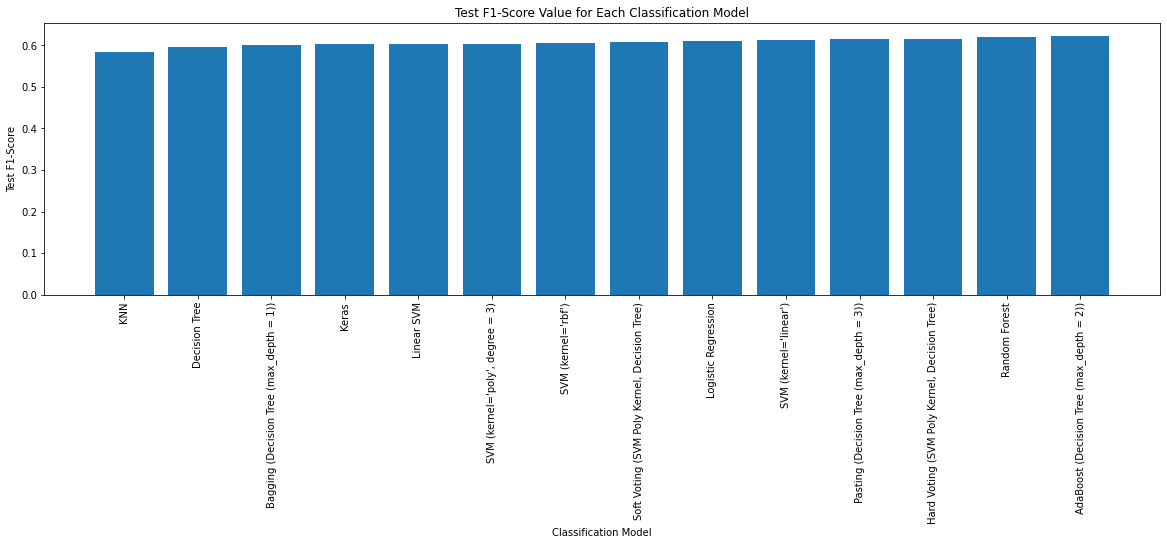

In [165]:
classification_model_list = list(report['Classification Model'])
test_f1_list = list(report['Test F1-Score'])
list_test_f1, list_classification_model = (list(t) for t in zip(*sorted(zip(test_f1_list, classification_model_list))))

plt.bar(list_classification_model, list_test_f1)
figure = plt.gcf()
figure.set_size_inches(20,5)
plt.title('Test F1-Score Value for Each Classification Model')
plt.xticks(rotation = 90)
plt.xlabel('Classification Model')
plt.ylabel('Test F1-Score')
plt.show()

### Best Mean Test F1-Score for each Classification Model

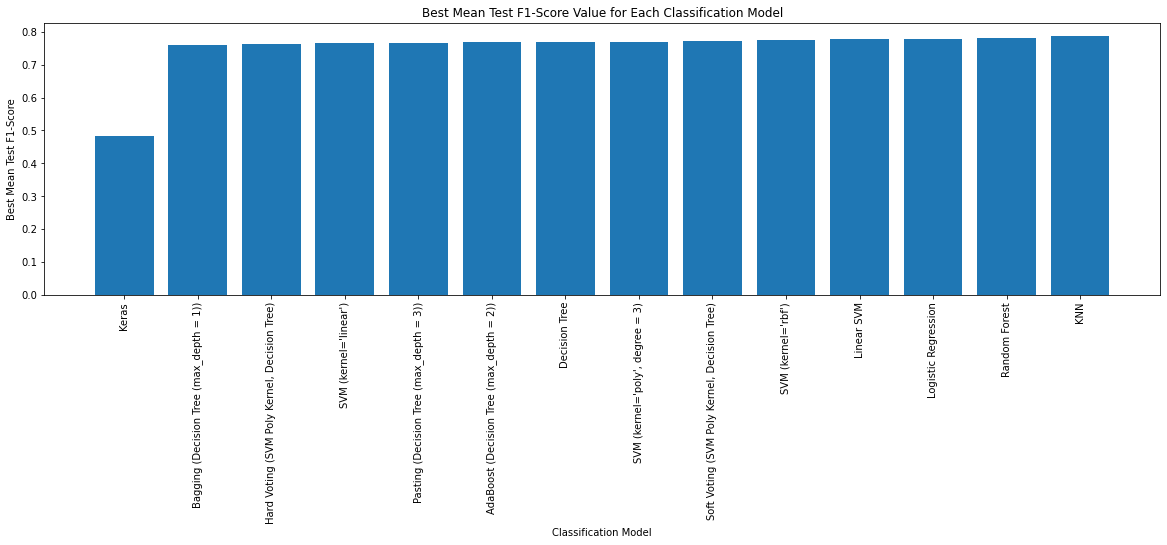

In [166]:
classification_model_list = list(report['Classification Model'])
test_f1_list = list(report['Best Mean Test F1-Score'])
list_test_f1, list_classification_model = (list(t) for t in zip(*sorted(zip(test_f1_list, classification_model_list))))

plt.bar(list_classification_model, list_test_f1)
figure = plt.gcf()
figure.set_size_inches(20,5)
plt.title('Best Mean Test F1-Score Value for Each Classification Model')
plt.xticks(rotation = 90)
plt.xlabel('Classification Model')
plt.ylabel('Best Mean Test F1-Score')
plt.show()

### Avg Test F1-Score and Best Mean Test F1-Score for each Classification Model

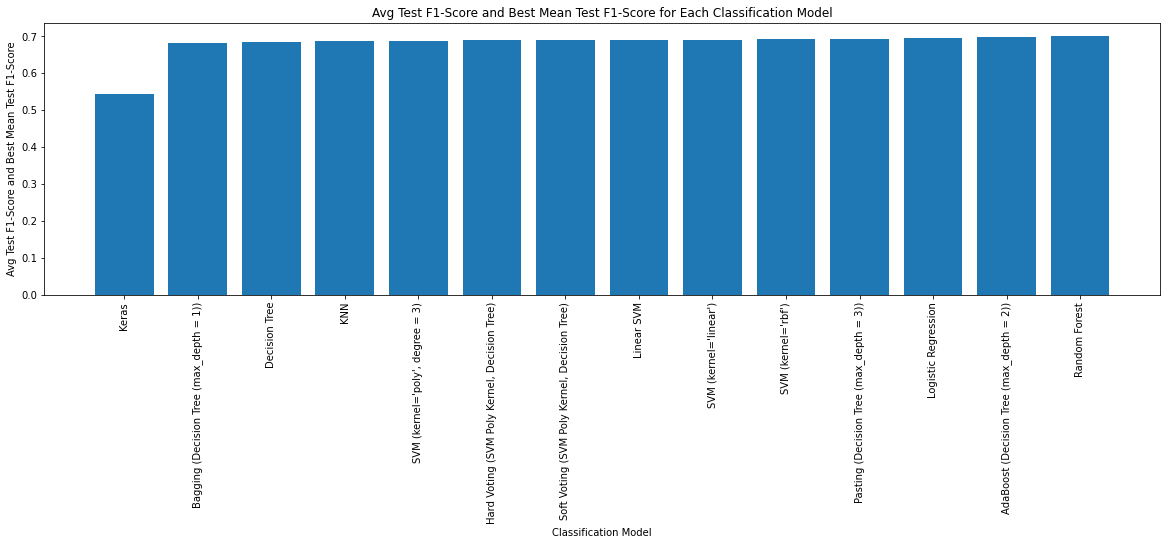

In [167]:
classification_model_list = list(report['Classification Model'])
test_f1_list = list(report['Avg Test F1-Score and Best Mean Test F1-Score'])
list_test_f1, list_classification_model = (list(t) for t in zip(*sorted(zip(test_f1_list, classification_model_list))))

plt.bar(list_classification_model, list_test_f1)
figure = plt.gcf()
figure.set_size_inches(20,5)
plt.title('Avg Test F1-Score and Best Mean Test F1-Score for Each Classification Model')
plt.xticks(rotation = 90)
plt.xlabel('Classification Model')
plt.ylabel('Avg Test F1-Score and Best Mean Test F1-Score')
plt.show()

### From the plots above, the Random Forest Classification Model had the 2nd highest Test F1-Score value, the 2nd highest Best Mean Test F1-Score value, and the highest Avg Test F1-Score and Best Mean Test F1-Score value


### Thus, from the plots above, our "best" classification model is the Random Forest Classification Model with the model parameters being n_estimators = 200, max_depth = 6, and criterion = 'entropy'